In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

In [11]:
df = pd.read_csv('datasets\\dengue.csv')

In [13]:
df 

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


<h1>1. Which year recorded the highest number of dengue cases</h1>

The year with the highest number of dengue cases is 2019 with 441902 cases.


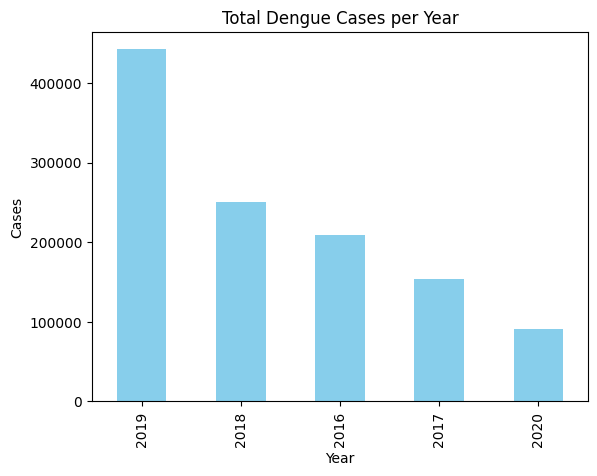

In [16]:
total_cases_per_year = df.groupby('Year')['Dengue_Cases'].sum()

highest_year = total_cases_per_year.idxmax()
highest_cases = total_cases_per_year.max()
print(f"The year with the highest number of dengue cases is {highest_year} with {highest_cases} cases.")

total_cases_per_year.sort_values(ascending=False).plot(kind='bar', color='skyblue')

plt.bar(highest_year, highest_cases, color='red')
plt.title('Total Dengue Cases per Year')
plt.ylabel('Cases')
plt.show()

<h1>2. In which year did the highest number of dengue deaths occur?</h1>

The year with the highest number of dengue deaths is 2016 with 8127 deaths.


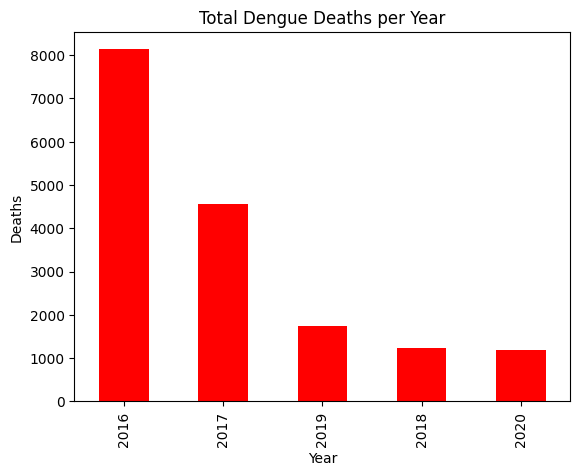

In [17]:
total_deaths_per_year = df.groupby('Year')['Dengue_Deaths'].sum()

highest_death_year = total_deaths_per_year.idxmax()
highest_deaths = total_deaths_per_year.max()

print(f"The year with the highest number of dengue deaths is {highest_death_year} with {highest_deaths} deaths.")

total_deaths_per_year.sort_values(ascending=False).plot(kind='bar', color='red')

plt.bar(highest_death_year, highest_deaths, color='green')
plt.title('Total Dengue Deaths per Year')
plt.ylabel('Deaths')
plt.show()

<h1>3. Which month has the highest average number of dengue cases?</h1>

The month with the highest average number of dengue cases is August with 2206.52 cases.


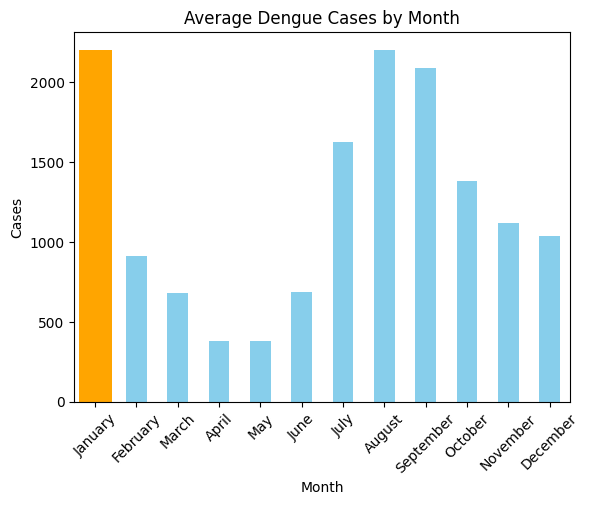

In [18]:
avg_cases_per_month = df.groupby('Month')['Dengue_Cases'].mean()

avg_cases_per_month = avg_cases_per_month.reindex(calendar.month_name[1:])

highest_avg_month = avg_cases_per_month.idxmax()
highest_avg_cases = avg_cases_per_month.max()

print(f"The month with the highest average number of dengue cases is {highest_avg_month} with {highest_avg_cases:.2f} cases.")

avg_cases_per_month.plot(kind='bar', color='skyblue')

plt.bar(highest_avg_month, highest_avg_cases, color='orange')
plt.title('Average Dengue Cases by Month')
plt.ylabel('Cases')
plt.xticks(rotation=45)
plt.show()

<h1>4. How do dengue cases vary across months and years?</h1>

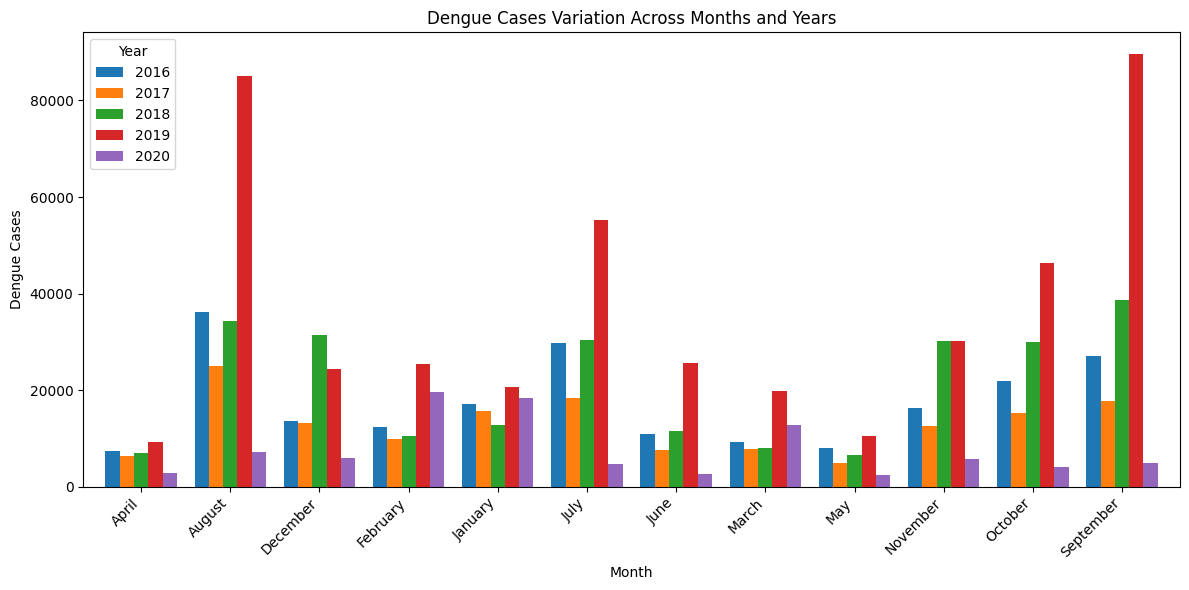

In [21]:
pivot_df = df.pivot_table(values='Dengue_Cases', index='Month', columns='Year', aggfunc='sum')

pivot_df.plot(kind='bar', figsize=(12, 6), width=0.8)

plt.title('Dengue Cases Variation Across Months and Years')
plt.xlabel('Month')
plt.ylabel('Dengue Cases')
plt.xticks(ticks=range(12), labels=pivot_df.index, rotation=45, ha='right')
plt.tight_layout()
plt.show()
plt.show()

<h1>5. Which region has the most dengue cases overall?</h1>

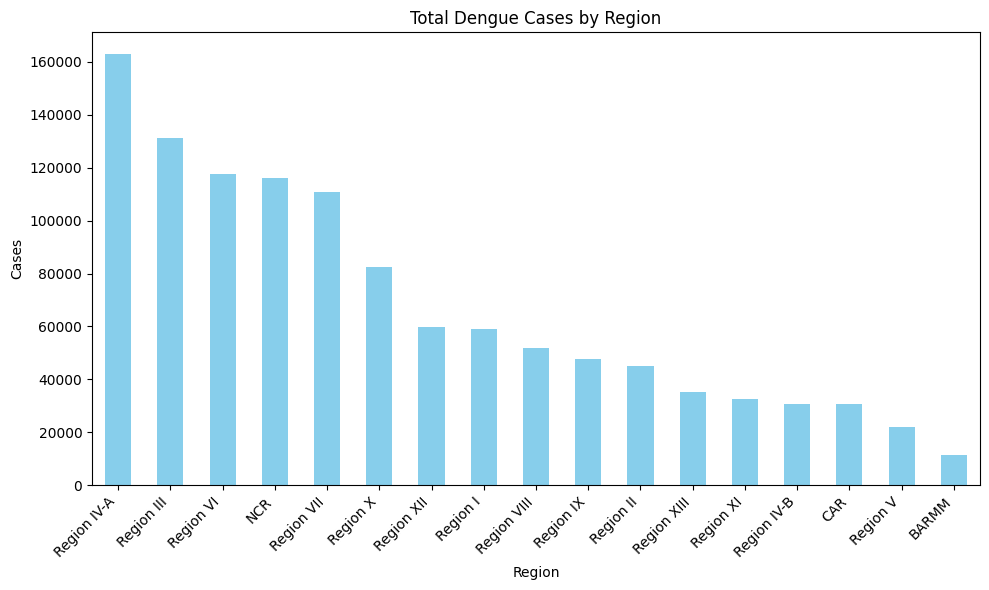

In [22]:
region_cases = df.groupby('Region')['Dengue_Cases'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))  
region_cases.plot(kind='bar', color='skyblue')

plt.title('Total Dengue Cases by Region')
plt.ylabel('Cases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<H1>6. Which region has the highest dengue deaths?</H1>

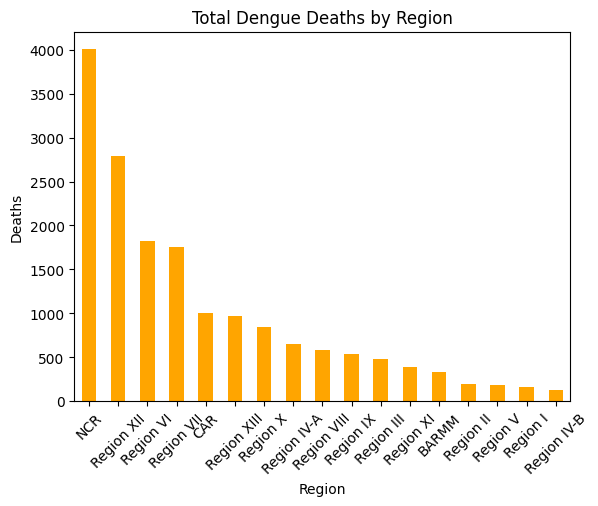

In [7]:
df.groupby('Region')['Dengue_Deaths'].sum().sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title('Total Dengue Deaths by Region')
plt.ylabel('Deaths')
plt.xticks(rotation=45)
plt.show()

<h1>7. Is there a correlation between dengue cases and deaths?</h1>

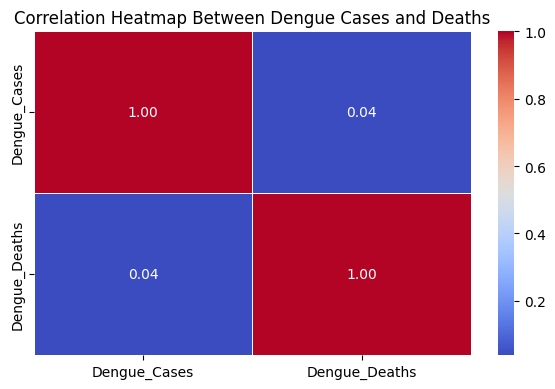

In [23]:
corr_matrix = df[['Dengue_Cases', 'Dengue_Deaths']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap Between Dengue Cases and Deaths')
plt.tight_layout()
plt.show()

<h1>8. What is the distribution of dengue cases across regions?</h1>

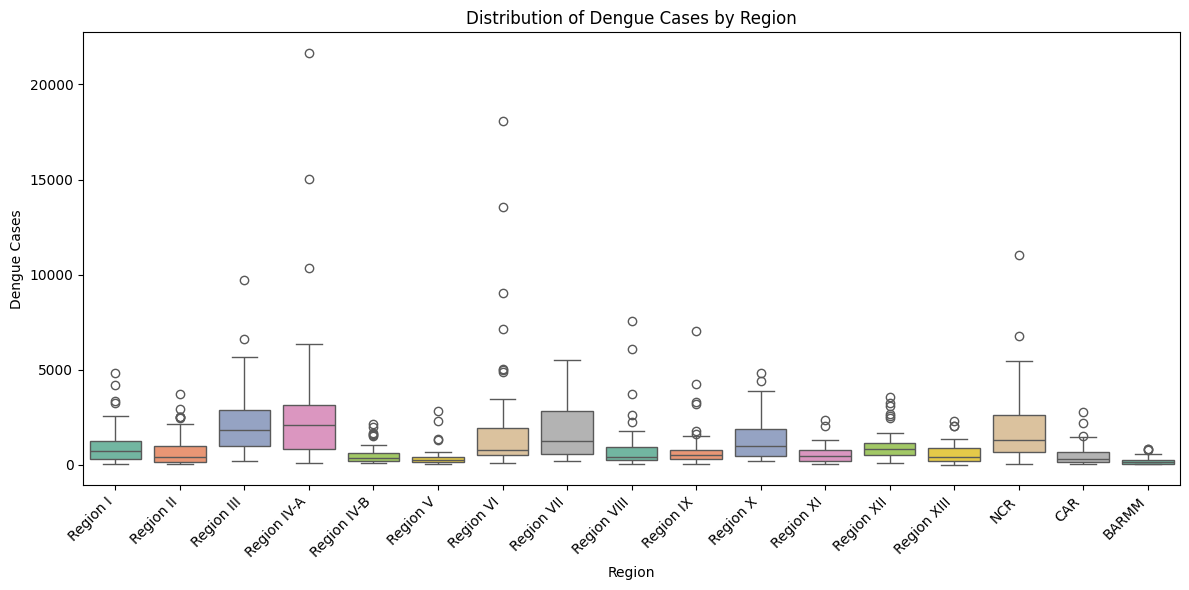

In [28]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Dengue_Cases', data=df, palette='Set2')
plt.title('Distribution of Dengue Cases by Region')
plt.xlabel('Region')
plt.ylabel('Dengue Cases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<h1>9. What is the distribution of dengue deaths across regions?</h1>

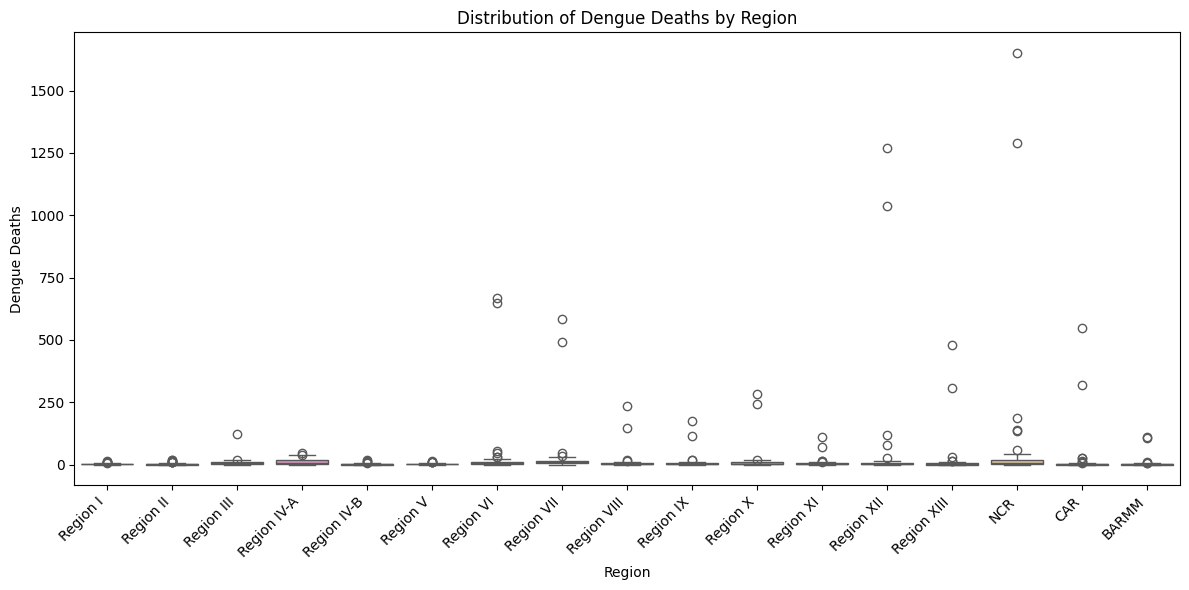

In [29]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Dengue_Deaths', data=df, palette='Set2')

plt.title('Distribution of Dengue Deaths by Region')
plt.xlabel('Region')
plt.ylabel('Dengue Deaths')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<h1>10. Which are the top 5 months with the highest total dengue cases?</h1>

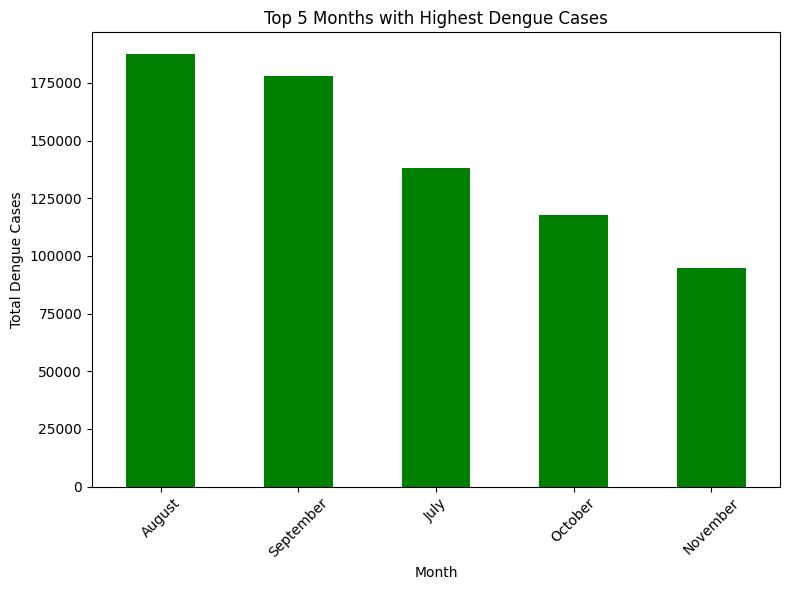

In [31]:
top_5_months = df.groupby('Month')['Dengue_Cases'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8, 6))
top_5_months.plot(kind='bar', color='green')
plt.title('Top 5 Months with Highest Dengue Cases')
plt.xlabel('Month')
plt.ylabel('Total Dengue Cases')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<h1>11. Which are the top 5 year with the highest total dengue cases?</h1>

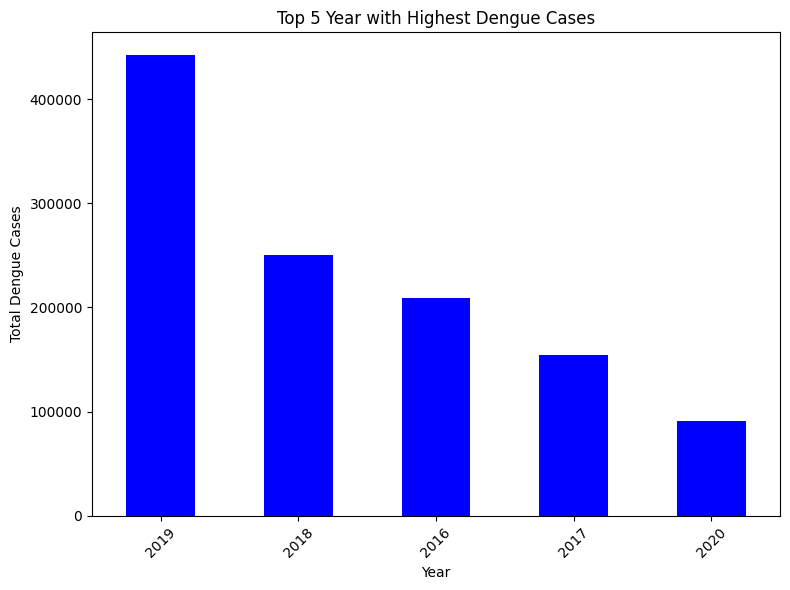

In [33]:
top_5_months = df.groupby('Year')['Dengue_Cases'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8, 6))
top_5_months.plot(kind='bar', color='blue')
plt.title('Top 5 Year with Highest Dengue Cases')
plt.xlabel('Year')
plt.ylabel('Total Dengue Cases')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<h1>12. What are the average cases and deaths per region?</h1>

<Figure size 1200x600 with 0 Axes>

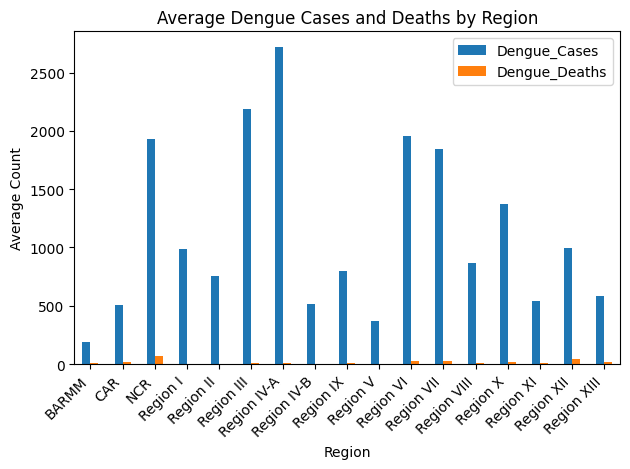

In [34]:
region_avg = df.groupby('Region')[['Dengue_Cases', 'Dengue_Deaths']].mean()
plt.figure(figsize=(12, 6))
region_avg.plot(kind='bar')

plt.title('Average Dengue Cases and Deaths by Region')
plt.xlabel('Region')
plt.ylabel('Average Count')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

<h1>13. What are the average cases and deaths per month?</h1>

<Figure size 1200x600 with 0 Axes>

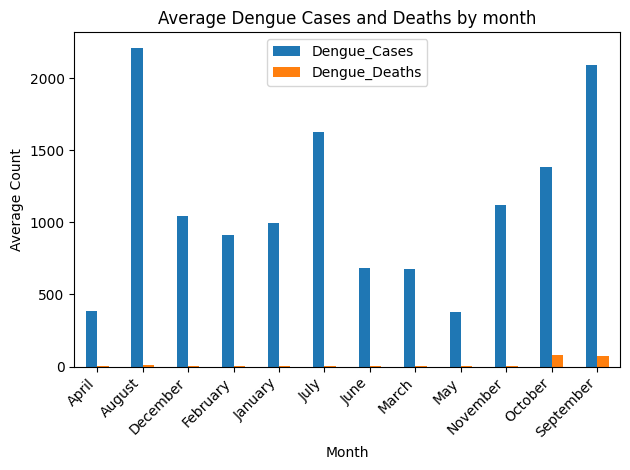

In [36]:
region_avg = df.groupby('Month')[['Dengue_Cases', 'Dengue_Deaths']].mean()
plt.figure(figsize=(12, 6))
region_avg.plot(kind='bar')

plt.title('Average Dengue Cases and Deaths by month')
plt.xlabel('Month')
plt.ylabel('Average Count')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

<h1>14. Dengue case by year</h1>

In [53]:
print(df.columns.tolist())

['Region', 'Year', 'Dengue Cases', 'Dengue Deaths']


In [56]:
df.columns = df.columns.str.strip()

Year
2020    1000
2021    1200
2022    1400
Name: Dengue Cases, dtype: int64


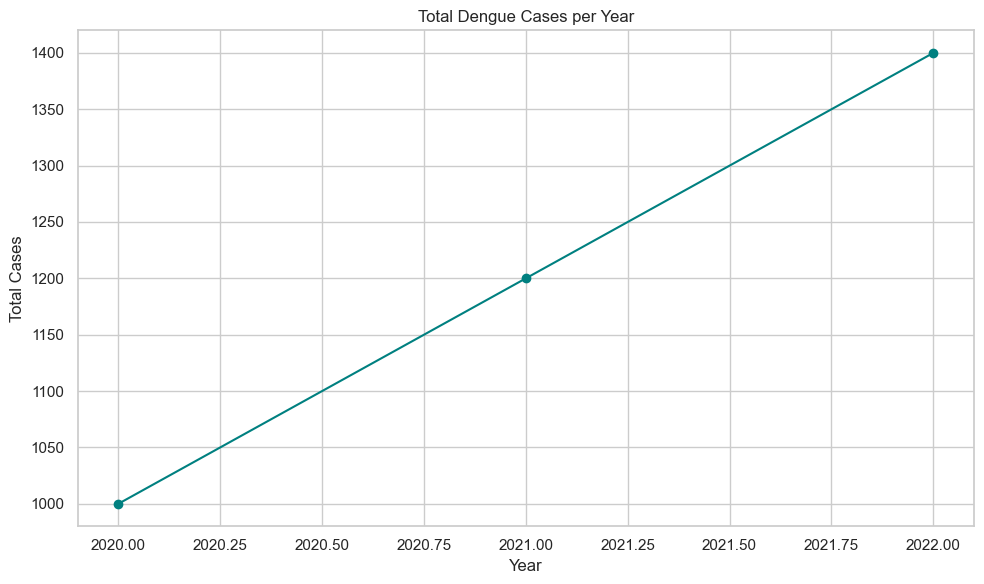

In [58]:
cases_by_year = df.groupby('Year')['Dengue Cases'].sum()
print(cases_by_year)

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
cases_by_year.plot(kind='line', marker='o', color='teal')
plt.title('Total Dengue Cases per Year')
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.grid(True)
plt.tight_layout()
plt.show()

<h1>15. Which regions recorded the least dengue deaths?<h/1>

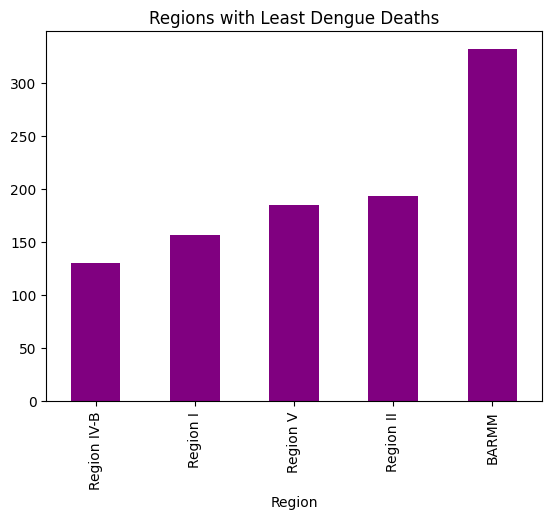

In [17]:
df.groupby('Region')['Dengue_Deaths'].sum().sort_values().head(5).plot(kind='bar', color='purple')
plt.title('Regions with Least Dengue Deaths')
plt.show()


<h1>16. In which year did dengue deaths peak?</h1>

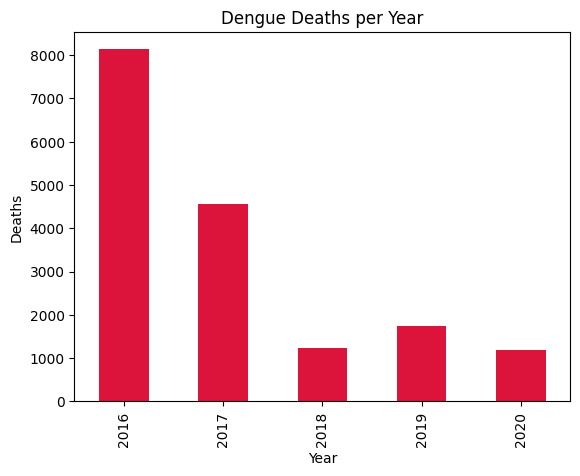

In [18]:
df.groupby('Year')['Dengue_Deaths'].sum().plot(kind='bar', color='crimson')
plt.title('Dengue Deaths per Year')
plt.ylabel('Deaths')
plt.show()

<h1>17. What is the death rate (deaths/cases) by region?</h1>

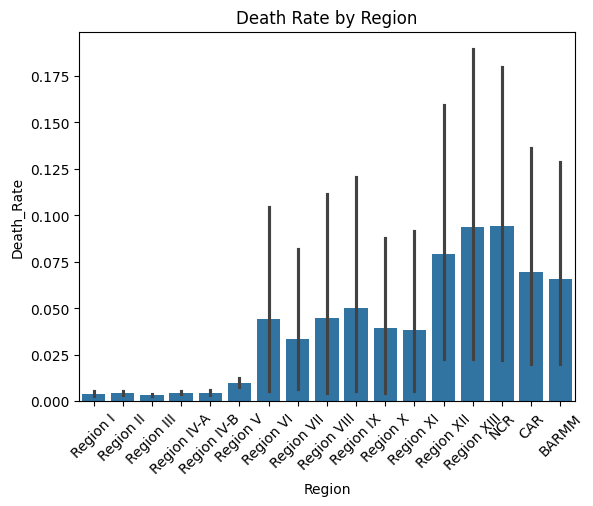

In [19]:
sns.barplot(x='Region', y='Death_Rate', data=df)
plt.title('Death Rate by Region')
plt.xticks(rotation=45)
plt.show()

<h1>18. What is the monthly average death rate?</h1>

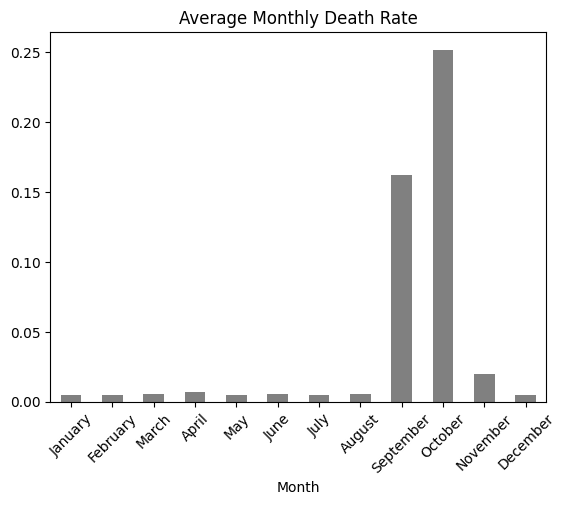

In [20]:
df.groupby('Month')['Death_Rate'].mean().reindex(calendar.month_name[1:]).plot(kind='bar', color='gray')
plt.title('Average Monthly Death Rate')
plt.xticks(rotation=45)
plt.show()


<h1>19. How have dengue cases changed over time?</h1>

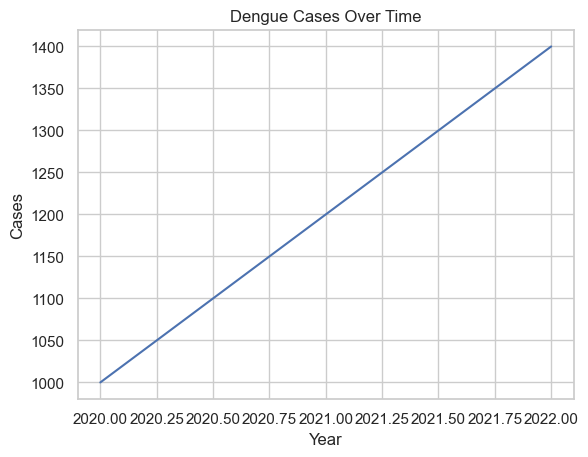

In [61]:
df.groupby('Year')['Dengue Cases'].sum().plot()
plt.title('Dengue Cases Over Time')
plt.ylabel('Cases')
plt.xlabel('Year')

plt.show()

<h1> 20. What is the trend of dengue deaths over time?</h1>

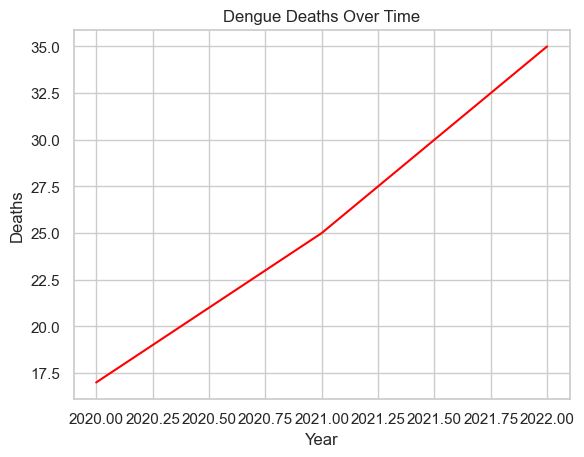

In [64]:
df.groupby('Year')['Dengue Deaths'].sum().plot(color='red')
plt.title('Dengue Deaths Over Time')
plt.ylabel('Deaths')
plt.show()